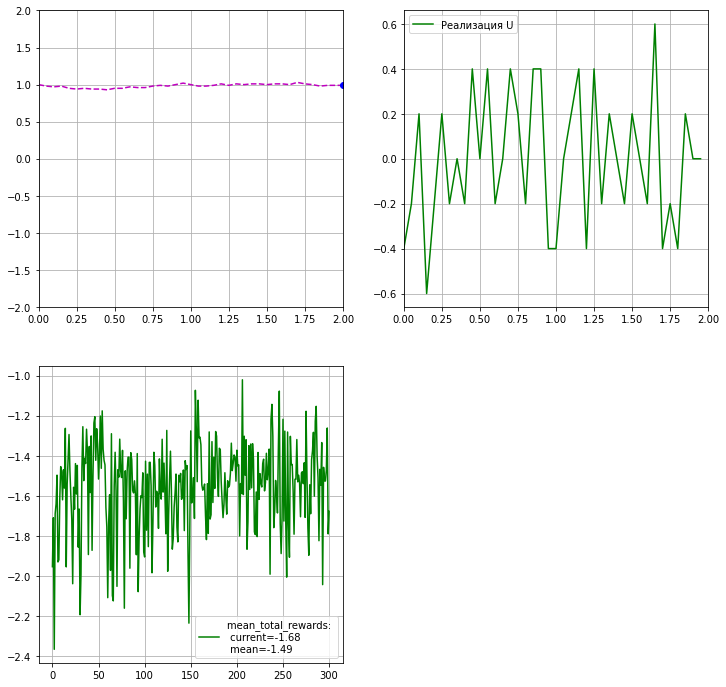

/home/heafer/src/RL/finite-horizon_control_problems/Agents/PPO.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.rng.choice(memory, size=self.batch_size)


KeyboardInterrupt: 

In [2]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import numpy as np
import torch.nn as nn
from Agents.Utilities.SequentialNetwork import SequentialNetwork
from Agents.PPO import PPO_Discrete
from Agents.Utilities.ContinuousAgentMakers.ContinuousAgentMaker import  ContinuousAgentMaker
from Environments.SimpleControlProblem.SimpleControlProblem import SimpleControlProblem
from Environments.SimpleControlProblem.SimpleControlProblemVisualizer import SimpleControlProblemVisualizer
import Solvers.OneAgentSolver as solver
%load_ext autoreload
%autoreload 2


#environment initialization
env = SimpleControlProblem()
action_n = 3
action_values = np.linspace(env.action_min, env.action_max, num=action_n)

#agent initialization
pi_model = SequentialNetwork([env.state_dim, 128, action_n], nn.ReLU())
v_model = SequentialNetwork([env.state_dim, 128, 1], nn.ReLU())
PPO = ContinuousAgentMaker(PPO_Discrete)
agent = PPO(
    pi_model,
    v_model,
    action_values=action_values,
    batch_size=10,
    epochs=5,
    clip_epsilon=.1)

#learning
visualizer = SimpleControlProblemVisualizer(waiting_for_show=100)
solver.go(
    env,
    agent,
    episode_n=1000,
    show=visualizer.show,
    session_len=40,
    session_n=5,
    agent_learning='by_sessions',
    use_additional_info_in_sessions=True
)
